In [2]:
# Importing necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [46]:
# Importing file and droping unnamed cloumn
cleanfile = pd.read_csv('/content/CleanAutomobile.csv')
#df = cleanfile.drop(columns = cleanfile[['Unnamed: 0.1']])
df = cleanfile.drop(columns = cleanfile[['Unnamed: 0']])
#df = cleanfile.drop(columns = cleanfile[['diesel']])
#df = cleanfile.drop(columns = cleanfile[['gas']])

In [47]:
df 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-bin,fuel-type-Diesel,diesel,fuel-type-Gas,gas
0,3.000000,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,0.757576,13495,11.200714,8.711667,low,0,0,1,0
1,3.000000,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,0.757576,16500,11.200714,8.711667,low,0,0,1,0
2,1.000000,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154.0,0.757576,16500,12.379737,9.046731,Medium,0,0,1,0
3,2.000000,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,0.833333,13950,9.800625,7.840500,low,0,0,1,0
4,2.000000,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,0.833333,17450,13.067500,10.691591,low,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.834146,122,GMC,diesel,std,four,hardtop,rwd,front,97.3,...,106.0,0.636364,11595,10.226739,11.200714,low,0,1,0,0
212,0.834146,122,GMC,gas,turbo,two,hardtop,rwd,rear,98.4,...,160.0,0.636364,21485,7.127727,7.840500,Medium,0,0,0,1
213,0.834146,122,Kia,gas,std,two,hardtop,fwd,front,104.3,...,114.0,0.727273,22625,7.127727,8.110862,low,0,0,0,1
214,0.834146,122,Kia,diesel,turbo,four,convertible,rwd,rear,104.3,...,114.0,0.833333,22625,10.226739,7.840500,low,0,1,0,0


<AxesSubplot:>

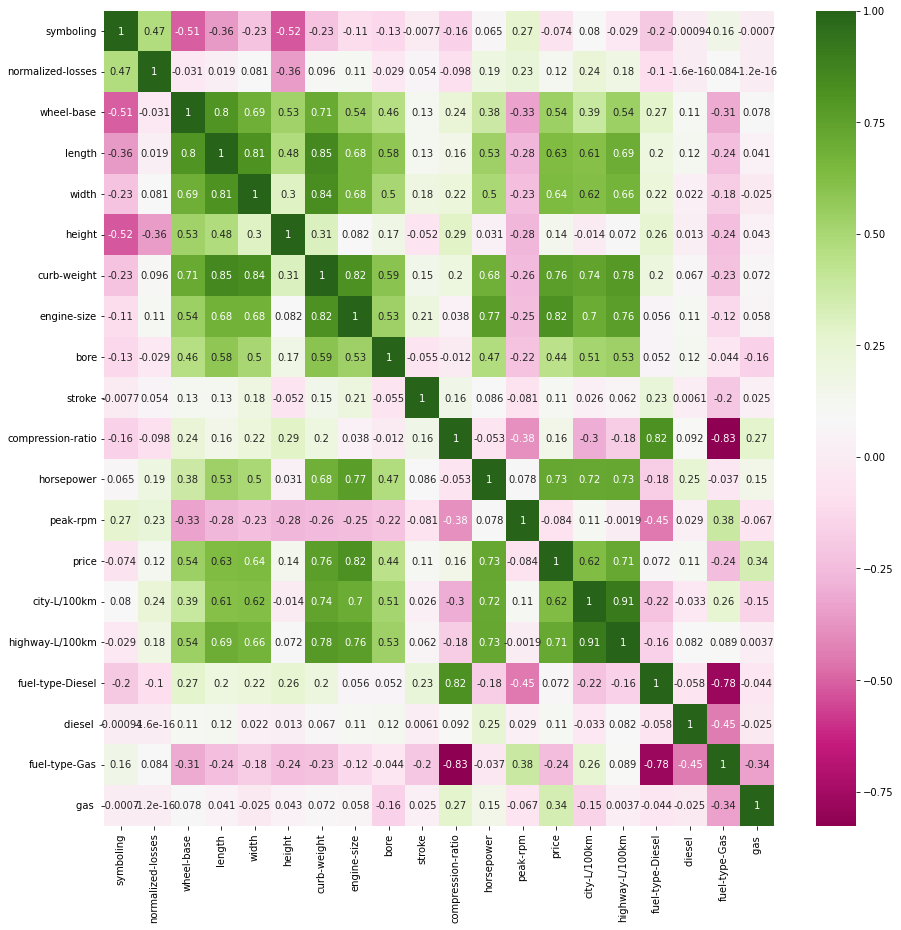

In [48]:
# Ploting heatmap to find the corelation of the attributes 
plt.subplots(figsize = ([15,15]))
sns.heatmap(df.corr(),cmap = 'PiYG',annot = True)

We see from the above heat map that the attributes "peak-rpm" and "horsepower" has a less correlation which means that they are not completely oppsistie to each other. These are attributes we use to pick out cars with Highest / lowest power and acceleration. 

\\Similarly the negative correalation with between "fuel-type-diesel" and "highway-L/100km" , giving us an understanding that if the vehical runs on Diesel then the mileage is likely to be low than compared model dataset.

Next , we take the 2 attributes "peak-rpm" and "horsepower" , with the "make" attribute, to find out which company offers the fastest sports cars.

In [50]:

# Creating new dataset with the decided attributes with the "make" attribute. Preforming elbow plots. 
n_df = df[['make','peak-rpm','horsepower']]
n_df

,make,peak-rpm,horsepower
0,alfa-romero,0.757576,111.0
1,alfa-romero,0.757576,111.0
2,alfa-romero,0.757576,154.0
3,audi,0.833333,102.0
4,audi,0.833333,115.0
...,...,...,...
211,GMC,0.636364,106.0
212,GMC,0.636364,160.0
213,Kia,0.727273,114.0
214,Kia,0.833333,114.0


In [51]:
x = n_df.iloc[:,[1,2]]
x

,peak-rpm,horsepower
0,0.757576,111.0
1,0.757576,111.0
2,0.757576,154.0
3,0.833333,102.0
4,0.833333,115.0
...,...,...
211,0.636364,106.0
212,0.636364,160.0
213,0.727273,114.0
214,0.833333,114.0


In [52]:
y = n_df.iloc[:,[0]]
y

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
211,GMC
212,GMC
213,Kia
214,Kia


Text(0, 0.5, 'make')

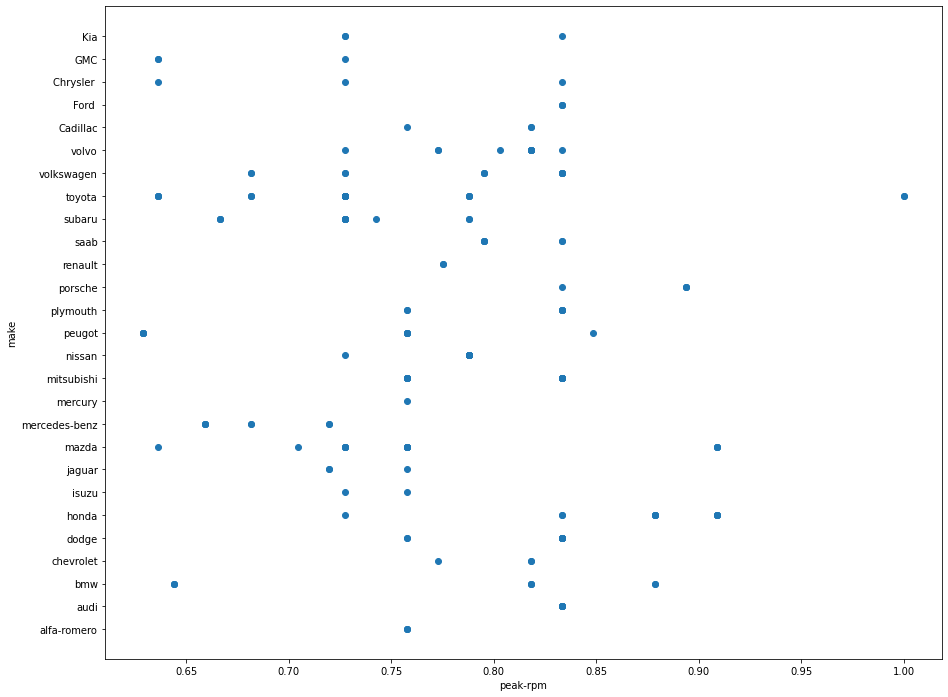

In [53]:
plt.figure(figsize = (15,12))
plt.scatter(x['peak-rpm'],y['make'])
plt.xlabel('peak-rpm')
plt.ylabel('make')

Text(0, 0.5, 'Make')

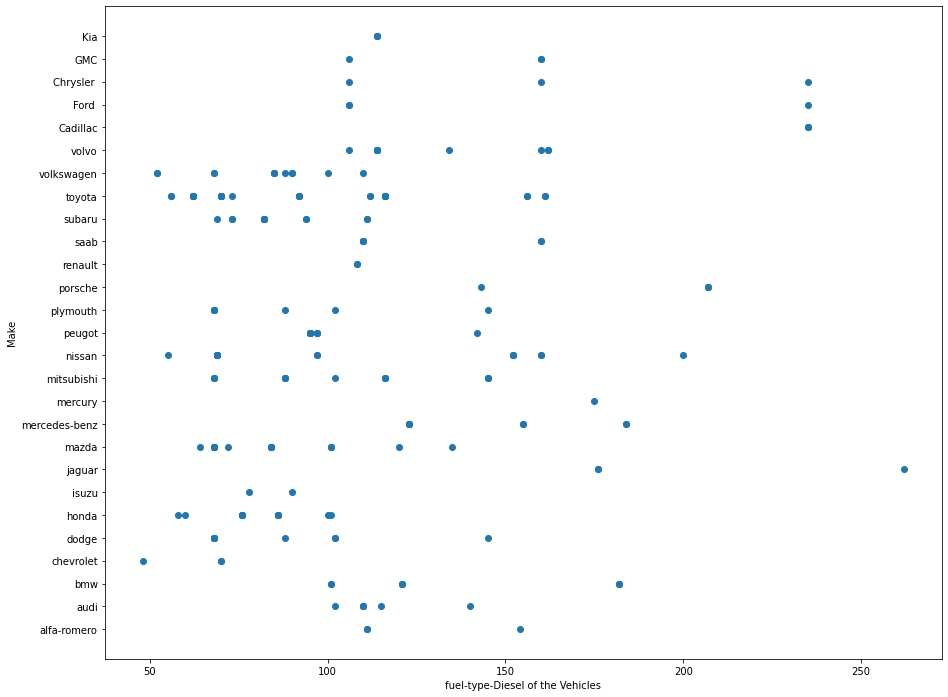

In [55]:
plt.figure(figsize = (15,12))
plt.scatter(x['horsepower'],y['make'])
plt.xlabel('fuel-type-Diesel of the Vehicles')
plt.ylabel('Make')

In [56]:
# Performing Elbow plot for 'peak-rpm'.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_X = pd.DataFrame(scaler.transform(x),columns = x.columns)
scaled_X

,peak-rpm,horsepower
0,-0.229443,0.085046
1,-0.229443,0.085046
2,-0.229443,1.120817
3,0.814606,-0.131744
4,0.814606,0.181396
...,...,...
211,-1.899923,-0.035393
212,-1.899923,1.265343
213,-0.647063,0.157309
214,0.814606,0.157309


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

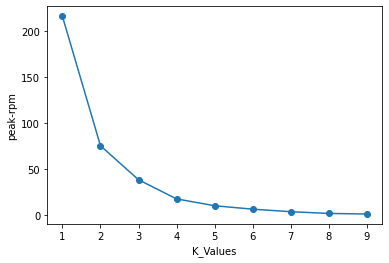

In [57]:
k_rng = range(1,10)
sse1 = []
for k1 in k_rng:
    km1 = KMeans(n_clusters = k1)
    km1.fit(scaled_X[['peak-rpm']])
    sse1.append(km1.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('peak-rpm')
plt.plot(k_rng,sse1,marker = 'o')

Considering optimal value for K in "peak-rpm" as 3 

---



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

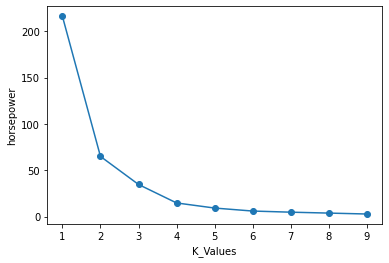

In [59]:
k_rng = range(1,10)
sse2 = []
for k2 in k_rng:
    km2 = KMeans(n_clusters = k2)
    km2.fit(scaled_X[['horsepower']])
    sse2.append(km2.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('horsepower')
plt.plot(k_rng,sse2,marker = 'o')

Considering optimal value for K in "peak-rpm" as 3 

---



In [60]:
# K-means for "peak-rpm" , "horsepower"
# the clusters represents the amount of RPM is offered offered by different Auto makers.

km1 = KMeans(n_clusters = 3)
km1.fit(scaled_X[['peak-rpm']])
y_predict = km1.predict(scaled_X[['peak-rpm']])
Mr_df = pd.concat([scaled_X['peak-rpm'],y['make']],axis = 1)
Mr_df['Cluster(Make vs Rpm)'] = y_predict
Mr_df

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,peak-rpm,make,Cluster(Make vs Rpm)
0,-0.229443,alfa-romero,0
1,-0.229443,alfa-romero,0
2,-0.229443,alfa-romero,0
3,0.814606,audi,1
4,0.814606,audi,1
...,...,...,...
211,-1.899923,GMC,2
212,-1.899923,GMC,2
213,-0.647063,Kia,0
214,0.814606,Kia,1


Text(0, 0.5, 'Maker')

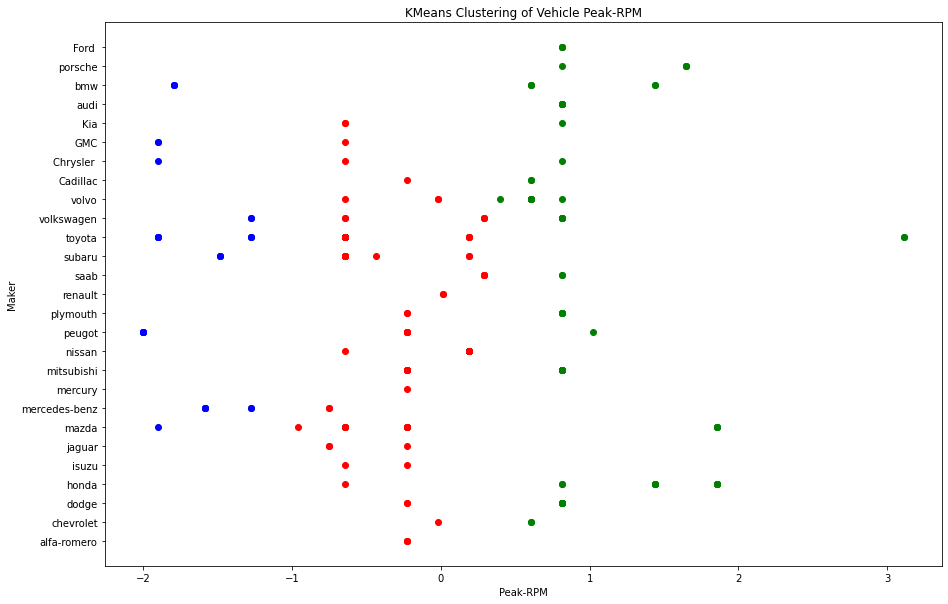

In [61]:
# KMeans for 'Peak RPM' with 'Make'.
Mr_df1 = Mr_df[Mr_df['Cluster(Make vs Rpm)'] == 0]
Mr_df2 = Mr_df[Mr_df['Cluster(Make vs Rpm)'] == 1]
Mr_df3 = Mr_df[Mr_df['Cluster(Make vs Rpm)'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(Mr_df1['peak-rpm'],Mr_df1['make'],color = 'red')
plt.scatter(Mr_df2['peak-rpm'],Mr_df2['make'],color = 'green')
plt.scatter(Mr_df3['peak-rpm'],Mr_df3['make'],color = 'blue')
plt.title('KMeans Clustering of Vehicle Peak-RPM')
plt.xlabel('Peak-RPM')
plt.ylabel('Maker')

In [62]:
# KMeans for 'horsepower' with 'Make'. 
km2 = KMeans(n_clusters = 3)
km2.fit(scaled_X[['horsepower']])
y_predict = km2.predict(scaled_X[['horsepower']])
Mh_df = pd.concat([scaled_X['horsepower'],y['make']],axis = 1)
Mh_df['Cluster(Make vs Horsepower)'] = y_predict
Mh_df

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,horsepower,make,Cluster(Make vs Horsepower)
0,0.085046,alfa-romero,2
1,0.085046,alfa-romero,2
2,1.120817,alfa-romero,0
3,-0.131744,audi,2
4,0.181396,audi,2
...,...,...,...
211,-0.035393,GMC,2
212,1.265343,GMC,0
213,0.157309,Kia,2
214,0.157309,Kia,2


Text(0, 0.5, 'Maker')

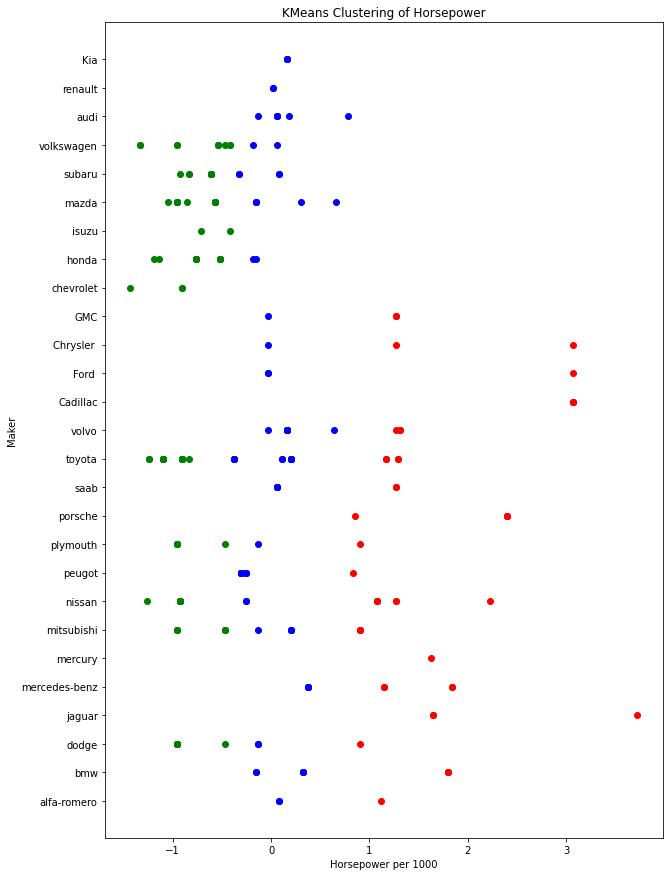

In [63]:
Mh_df1 = Mh_df[Mh_df['Cluster(Make vs Horsepower)'] == 0]
Mh_df2 = Mh_df[Mh_df['Cluster(Make vs Horsepower)'] == 1]
Mh_df3 = Mh_df[Mh_df['Cluster(Make vs Horsepower)'] == 2]
plt.subplots(figsize = ([10,15]))
plt.scatter(Mh_df1['horsepower'],Mh_df1['make'],color = 'red')
plt.scatter(Mh_df2['horsepower'],Mh_df2['make'],color = 'green')
plt.scatter(Mh_df3['horsepower'],Mh_df3['make'],color = 'blue')
plt.title('KMeans Clustering of Horsepower')
plt.xlabel('Horsepower per 1000')
plt.ylabel('Maker')

Text(0, 0.5, 'Euclidean Distance of RPM')

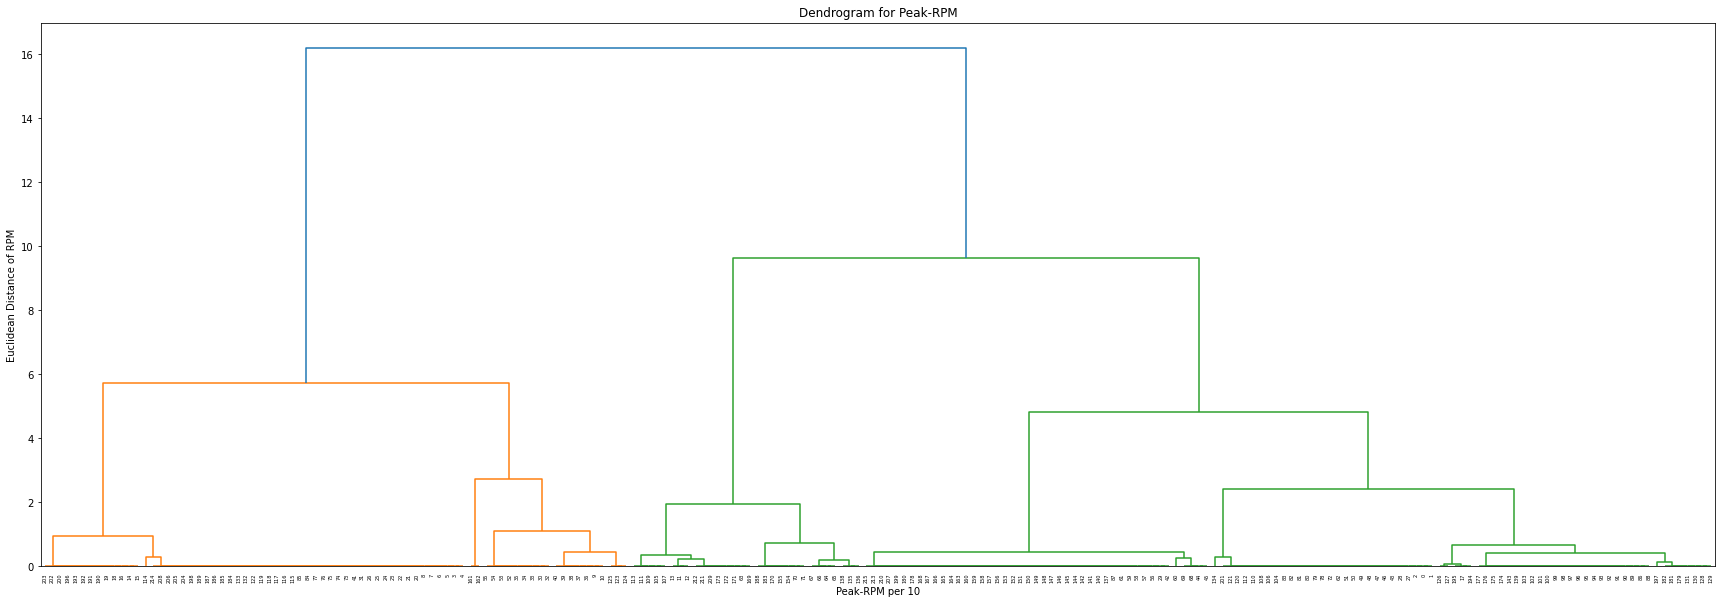

In [64]:
# Creating Dendogram, also known as the tree diagram for the Peak-rpm 
plt.figure(figsize = (30,10))
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(scaled_X[['peak-rpm']],method = 'ward'))
plt.title('Dendrogram for Peak-RPM')
plt.xlabel('Peak-RPM per 10')
plt.ylabel('Euclidean Distance of RPM')

Text(0, 0.5, 'Euclidean Distance')

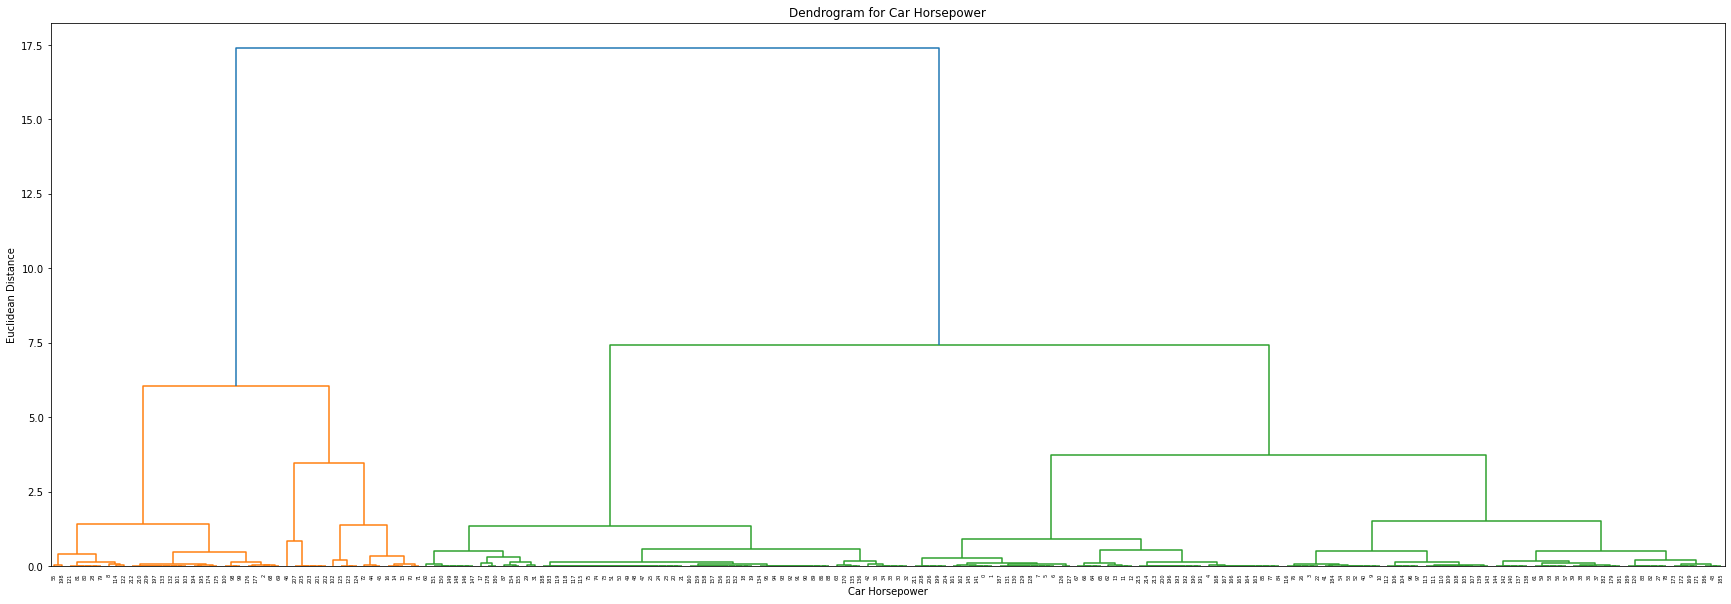

In [65]:
# # Creating Dendogram, also known as the tree diagram for the Horsepower 
plt.figure(figsize = (30,10))
dendrograms = sch.dendrogram(sch.linkage(scaled_X[['horsepower']],method = 'ward'))
plt.title('Dendrogram for Car Horsepower')
plt.xlabel('Car Horsepower')
plt.ylabel('Euclidean Distance')

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
# perform the algorithm to 'peak-rpm' .
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
hc_predict_rpm = hc.fit_predict(scaled_X[['peak-rpm']])
rpm = pd.concat([scaled_X['peak-rpm'],y['make']],axis = 1)
rpm['Clusters'] = hc_predict_rpm
rpm

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,peak-rpm,make,Clusters
0,-0.229443,alfa-romero,1
1,-0.229443,alfa-romero,1
2,-0.229443,alfa-romero,1
3,0.814606,audi,0
4,0.814606,audi,0
...,...,...,...
211,-1.899923,GMC,2
212,-1.899923,GMC,2
213,-0.647063,Kia,1
214,0.814606,Kia,0


In [68]:
# Performing algorithm to 'horsepower'.
hc1 = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
hc_predict_horsepower = hc1.fit_predict(scaled_X[['horsepower']])
hps = pd.concat([scaled_X['horsepower'],y['make']],axis = 1)
hps['Clusters'] = hc_predict_horsepower
hps

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,horsepower,make,Clusters
0,0.085046,alfa-romero,1
1,0.085046,alfa-romero,1
2,1.120817,alfa-romero,0
3,-0.131744,audi,1
4,0.181396,audi,1
...,...,...,...
211,-0.035393,GMC,1
212,1.265343,GMC,0
213,0.157309,Kia,1
214,0.157309,Kia,1


Text(0, 0.5, 'Make')

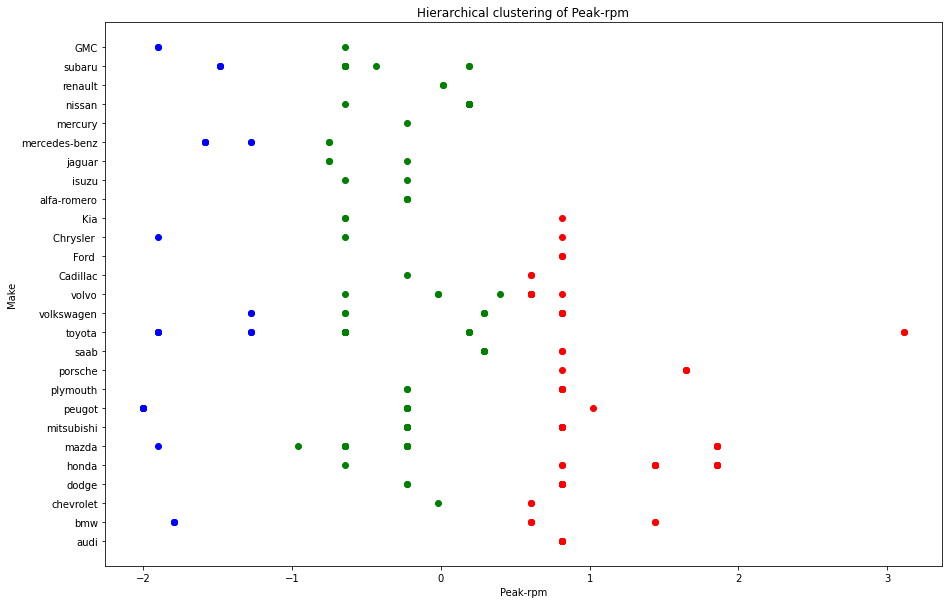

In [71]:
# Plotting the scatterplot
prpm1 = rpm[rpm['Clusters'] == 0]
prpm2 = rpm[rpm['Clusters'] == 1]
prpm3 = rpm[rpm['Clusters'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(prpm1['peak-rpm'],prpm1['make'],color = 'red')
plt.scatter(prpm2['peak-rpm'],prpm2['make'],color = 'green')
plt.scatter(prpm3['peak-rpm'],prpm3['make'],color = 'blue')
plt.title('Hierarchical clustering of Peak-rpm')
plt.xlabel('Peak-rpm')
plt.ylabel('Make')

Text(0, 0.5, 'Make')

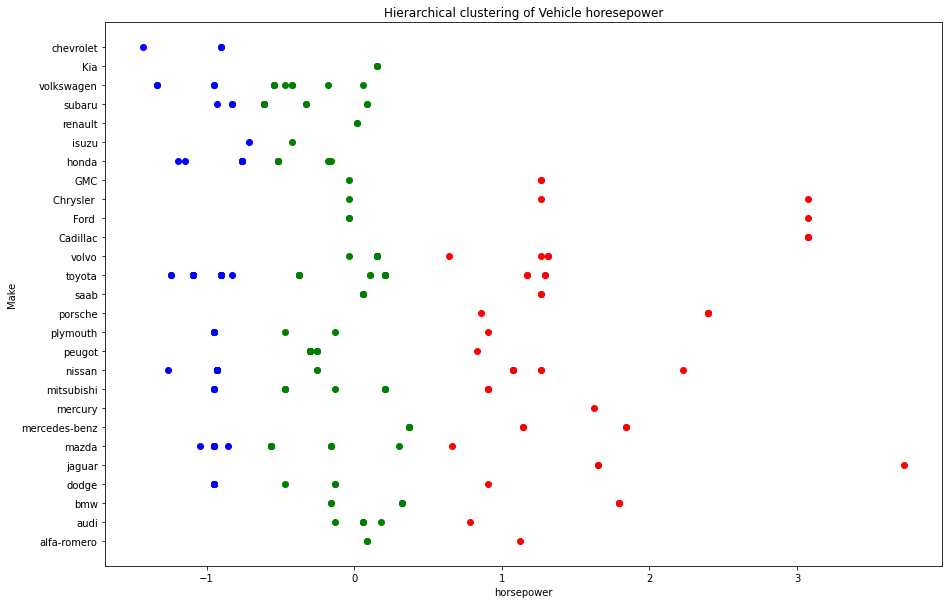

In [72]:
# Plotting the scatterplot
hr1 = hps[hps['Clusters'] == 0]
hr2 = hps[hps['Clusters'] == 1]
hr3 = hps[hps['Clusters'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(hr1['horsepower'],hr1['make'],color = 'red')
plt.scatter(hr2['horsepower'],hr2['make'],color = 'green')
plt.scatter(hr3['horsepower'],hr3['make'],color = 'blue')
plt.title('Hierarchical clustering of Vehicle horesepower')
plt.xlabel('horsepower')
plt.ylabel('Make')